# Decision Tree and Random Forest Classifiers

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv('C:/Users/Lauren/Documents/ORIE4741/4741project/var_num_hgr_null.csv')

In [3]:
df.head()

,CASEID,AGE1979,SAMPLE_SEX,SAMPLE_RACE,AFQT,ASVAB,HIGHESTGRADE,HEALTHLIMIT,INCOME,INDUSTRY,NUMJOBS,URBAN_RURAL,REGION,MARSTAT_COL,YR_ENT_LF,YR_EMP,YR_UNEMP,YR_OUT,AGE_ENT,UNEMP
0,2.0,20.0,2.0,3.0,6841.0,52.0,2.0,0.0,19000.0,4.0,2.0,1.0,1.0,1.0,1979.0,15.0,0.0,4.0,20.0,0.0
1,6.0,18.0,1.0,3.0,99393.0,68.0,3.0,0.0,25000.0,6.0,2.0,1.0,4.0,2.0,1982.0,15.0,0.0,0.0,21.0,0.0
2,8.0,20.0,2.0,3.0,44022.0,48.0,2.0,0.0,15500.0,8.0,3.0,1.0,1.0,3.0,1981.0,16.0,0.0,1.0,22.0,0.0
3,9.0,15.0,1.0,3.0,59683.0,46.0,3.0,0.0,20000.0,10.0,1.0,1.0,1.0,2.0,1981.0,16.0,0.0,1.0,17.0,0.0
4,13.0,20.0,1.0,3.0,72313.0,30.0,3.0,0.0,31000.0,9.0,2.0,1.0,1.0,2.0,1979.0,19.0,0.0,0.0,20.0,0.0


In [4]:
#create a boolean column to see if they have ever experienced unemployment
def exper_tf(row):
    if row['YR_UNEMP']>0.0:
        return 1
    else:
        return 0

In [5]:
df['UNEMP_TF'] = df.apply(exper_tf, axis = 1)

In [6]:
df = df.drop('YR_UNEMP', 1)
df = df.drop('UNEMP', 1)

## Encode categorical variables

In [7]:
clean_data_dumb = pd.get_dummies(df, prefix='Sex', columns=['SAMPLE_SEX'], drop_first=True)
clean_data_dumb=clean_data_dumb.rename(columns = {'Sex_1.0':'Male'})
clean_data_dumb=clean_data_dumb.rename(columns = {'Sex_2.0':'Female'})

In [8]:
clean_data_dumb = pd.get_dummies(clean_data_dumb, prefix='Race', columns=['SAMPLE_RACE'], drop_first=True)
clean_data_dumb=clean_data_dumb.rename(columns = {'Race_3.0':'NBNH'})
clean_data_dumb=clean_data_dumb.rename(columns = {'Race_2.0':'Black'})
clean_data_dumb=clean_data_dumb.rename(columns = {'Race_1.0':'Hispanic'})

In [9]:
clean_data_dumb = pd.get_dummies(clean_data_dumb, prefix='Region', columns=['REGION'], drop_first=True)
clean_data_dumb=clean_data_dumb.rename(columns = {'Region_4.0':'West'})
clean_data_dumb=clean_data_dumb.rename(columns = {'Region_3.0':'South'})
clean_data_dumb=clean_data_dumb.rename(columns = {'Region_2.0':'North_Central'})
clean_data_dumb=clean_data_dumb.rename(columns = {'Region_1.0':'Northeast'})

In [10]:
clean_data_dumb = pd.get_dummies(clean_data_dumb, prefix='Mar', columns=['MARSTAT_COL'], drop_first=True)
clean_data_dumb=clean_data_dumb.rename(columns = {'Mar_3.0':'Other'})
clean_data_dumb=clean_data_dumb.rename(columns = {'Mar_2.0':'Married'})
clean_data_dumb=clean_data_dumb.rename(columns = {'Mar_1.0':'Never_Mar'})

In [11]:
clean_data_dumb.head()

,CASEID,AGE1979,AFQT,ASVAB,HIGHESTGRADE,HEALTHLIMIT,INCOME,INDUSTRY,NUMJOBS,URBAN_RURAL,...,AGE_ENT,UNEMP_TF,Female,Black,NBNH,North_Central,South,West,Married,Other
0,2.0,20.0,6841.0,52.0,2.0,0.0,19000.0,4.0,2.0,1.0,...,20.0,0,1,0,1,0,0,0,0,0
1,6.0,18.0,99393.0,68.0,3.0,0.0,25000.0,6.0,2.0,1.0,...,21.0,0,0,0,1,0,0,1,1,0
2,8.0,20.0,44022.0,48.0,2.0,0.0,15500.0,8.0,3.0,1.0,...,22.0,0,1,0,1,0,0,0,0,1
3,9.0,15.0,59683.0,46.0,3.0,0.0,20000.0,10.0,1.0,1.0,...,17.0,0,0,0,1,0,0,0,1,0
4,13.0,20.0,72313.0,30.0,3.0,0.0,31000.0,9.0,2.0,1.0,...,20.0,0,0,0,1,0,0,0,1,0


## Decision Tree Classifier

In [12]:
import sklearn
from sklearn import tree

In [13]:
X = clean_data_dumb.loc[:, clean_data_dumb.columns != 'UNEMP_TF']
target = clean_data_dumb['UNEMP_TF']

In [14]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, target, test_size=0.2)

In [15]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [16]:
clf.decision_path

<bound method BaseDecisionTree.decision_path of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')>

In [17]:
clf.feature_importances_

array([ 0.10788586,  0.0252771 ,  0.09670781,  0.08088311,  0.01130853,
        0.00289335,  0.11112987,  0.04062882,  0.01986249,  0.00795169,
        0.08342147,  0.19899426,  0.08124574,  0.05070389,  0.01875183,
        0.00792611,  0.00764055,  0.00590838,  0.01340738,  0.01033918,
        0.01238879,  0.0047438 ])

In [18]:
clf.score(X_test, y_test)

0.70729455216989845

In [19]:
#take two corresponding features
#take the data of those column indices
#pairs 2,3 income 6, industry 7, 11,10, combos

### Make a graph of decision surface for paired features

In [60]:
n_classes = 2
plot_colors = "rb"
plot_step = 2

In [61]:
X.dtypes

CASEID           float64
AGE1979          float64
AFQT             float64
ASVAB            float64
HIGHESTGRADE     float64
HEALTHLIMIT      float64
INCOME           float64
INDUSTRY         float64
NUMJOBS          float64
URBAN_RURAL      float64
YR_ENT_LF        float64
YR_EMP           float64
YR_OUT           float64
AGE_ENT          float64
Female             uint8
Black              uint8
NBNH               uint8
North_Central      uint8
South              uint8
West               uint8
Married            uint8
Other              uint8
dtype: object

In [62]:
#test out different pairs- adjust plot_step accordingly or it will crash
pair = [6,11]
names = [X.columns[pair[0]], X.columns[pair[1]]]
X_tmp = X_train.loc[:, (clean_data_dumb.columns == names[0]) | (clean_data_dumb.columns == names[1])]

In [63]:
y = y_train
clf = tree.DecisionTreeClassifier().fit(X_tmp, y)
X_tmp = X_tmp.as_matrix()

In [64]:
x_min, x_max = X_tmp[:, 0].min() - 1, X_tmp[:, 0].max() + 1
y_min, y_max = X_tmp[:, 1].min() - 1, X_tmp[:, 1].max() + 1

In [66]:
#BEFORE RUNNING THIS CELL- DID YOU CHANGE THE PLOT_STEP ACCORDINGLY??
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

(-5802.3158718568711, 107455.31587185687, 1.0, 20.068320882182025)

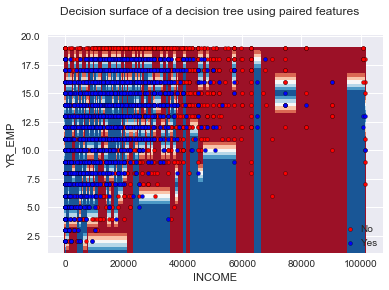

In [67]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu)
plt.xlabel(X.columns[pair[0]])
plt.ylabel(X.columns[pair[1]])

target_names = ['No', 'Yes']
for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X_tmp[idx, 0], X_tmp[idx, 1], c=color, label=target_names[i],
                    cmap=plt.cm.RdBu, edgecolor='black', s=15)
        
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

### Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
clf = RandomForestClassifier(n_estimators=50)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [84]:
clf.score(X_test, y_test)

0.74053554939981536

In [ ]:
#random forest first pass (with 10 trees) does not do any better than a single decision tree
#50 trees gets us up to 75 percent accuracy on the test set

In [ ]:
#try tree on males only
#do cross validation on the tre

## Now, Use Male Only Data

In [8]:
df = pd.read_csv('C:/Users/Lauren/Documents/ORIE4741/4741project/var_num_hgr_null.csv')

In [9]:
df.head()

,CASEID,AGE1979,SAMPLE_SEX,SAMPLE_RACE,AFQT,ASVAB,HIGHESTGRADE,HEALTHLIMIT,INCOME,INDUSTRY,NUMJOBS,URBAN_RURAL,REGION,MARSTAT_COL,YR_ENT_LF,YR_EMP,YR_UNEMP,YR_OUT,AGE_ENT,UNEMP
0,2.0,20.0,2.0,3.0,6841.0,52.0,2.0,0.0,19000.0,4.0,2.0,1.0,1.0,1.0,1979.0,15.0,0.0,4.0,20.0,0.0
1,6.0,18.0,1.0,3.0,99393.0,68.0,3.0,0.0,25000.0,6.0,2.0,1.0,4.0,2.0,1982.0,15.0,0.0,0.0,21.0,0.0
2,8.0,20.0,2.0,3.0,44022.0,48.0,2.0,0.0,15500.0,8.0,3.0,1.0,1.0,3.0,1981.0,16.0,0.0,1.0,22.0,0.0
3,9.0,15.0,1.0,3.0,59683.0,46.0,3.0,0.0,20000.0,10.0,1.0,1.0,1.0,2.0,1981.0,16.0,0.0,1.0,17.0,0.0
4,13.0,20.0,1.0,3.0,72313.0,30.0,3.0,0.0,31000.0,9.0,2.0,1.0,1.0,2.0,1979.0,19.0,0.0,0.0,20.0,0.0


In [10]:
df = df.loc[df['SAMPLE_SEX']==1.0]

In [11]:
df.head()

,CASEID,AGE1979,SAMPLE_SEX,SAMPLE_RACE,AFQT,ASVAB,HIGHESTGRADE,HEALTHLIMIT,INCOME,INDUSTRY,NUMJOBS,URBAN_RURAL,REGION,MARSTAT_COL,YR_ENT_LF,YR_EMP,YR_UNEMP,YR_OUT,AGE_ENT,UNEMP
1,6.0,18.0,1.0,3.0,99393.0,68.0,3.0,0.0,25000.0,6.0,2.0,1.0,4.0,2.0,1982.0,15.0,0.0,0.0,21.0,0.0
3,9.0,15.0,1.0,3.0,59683.0,46.0,3.0,0.0,20000.0,10.0,1.0,1.0,1.0,2.0,1981.0,16.0,0.0,1.0,17.0,0.0
4,13.0,20.0,1.0,3.0,72313.0,30.0,3.0,0.0,31000.0,9.0,2.0,1.0,1.0,2.0,1979.0,19.0,0.0,0.0,20.0,0.0
7,17.0,22.0,1.0,3.0,89669.0,58.0,2.0,0.0,20000.0,6.0,2.0,1.0,1.0,1.0,1979.0,19.0,0.0,0.0,22.0,0.0
8,18.0,21.0,1.0,3.0,95977.0,61.0,2.0,0.0,57124.0,6.0,2.0,1.0,4.0,2.0,1979.0,19.0,0.0,0.0,21.0,0.0


In [12]:
#create a boolean column to see if they have ever experienced unemployment
def exper_tf(row):
    if row['YR_UNEMP']>0.0:
        return 1
    else:
        return 0

In [13]:
df['UNEMP_TF'] = df.apply(exper_tf, axis = 1)

In [14]:
df = df.drop('YR_UNEMP', 1)
df = df.drop('UNEMP', 1)

In [15]:
clean_data_dumb = pd.get_dummies(df, prefix='Race', columns=['SAMPLE_RACE'], drop_first=True)
clean_data_dumb=clean_data_dumb.rename(columns = {'Race_3.0':'NBNH'})
clean_data_dumb=clean_data_dumb.rename(columns = {'Race_2.0':'Black'})
clean_data_dumb=clean_data_dumb.rename(columns = {'Race_1.0':'Hispanic'})

In [16]:
clean_data_dumb = pd.get_dummies(clean_data_dumb, prefix='Region', columns=['REGION'], drop_first=True)
clean_data_dumb=clean_data_dumb.rename(columns = {'Region_4.0':'West'})
clean_data_dumb=clean_data_dumb.rename(columns = {'Region_3.0':'South'})
clean_data_dumb=clean_data_dumb.rename(columns = {'Region_2.0':'North_Central'})
clean_data_dumb=clean_data_dumb.rename(columns = {'Region_1.0':'Northeast'})

In [17]:
clean_data_dumb = pd.get_dummies(clean_data_dumb, prefix='Mar', columns=['MARSTAT_COL'], drop_first=True)
clean_data_dumb=clean_data_dumb.rename(columns = {'Mar_3.0':'Other'})
clean_data_dumb=clean_data_dumb.rename(columns = {'Mar_2.0':'Married'})
clean_data_dumb=clean_data_dumb.rename(columns = {'Mar_1.0':'Never_Mar'})

In [18]:
clean_data_dumb.head()

,CASEID,AGE1979,SAMPLE_SEX,AFQT,ASVAB,HIGHESTGRADE,HEALTHLIMIT,INCOME,INDUSTRY,NUMJOBS,...,YR_OUT,AGE_ENT,UNEMP_TF,Black,NBNH,North_Central,South,West,Married,Other
1,6.0,18.0,1.0,99393.0,68.0,3.0,0.0,25000.0,6.0,2.0,...,0.0,21.0,0,0,1,0,0,1,1,0
3,9.0,15.0,1.0,59683.0,46.0,3.0,0.0,20000.0,10.0,1.0,...,1.0,17.0,0,0,1,0,0,0,1,0
4,13.0,20.0,1.0,72313.0,30.0,3.0,0.0,31000.0,9.0,2.0,...,0.0,20.0,0,0,1,0,0,0,1,0
7,17.0,22.0,1.0,89669.0,58.0,2.0,0.0,20000.0,6.0,2.0,...,0.0,22.0,0,0,1,0,0,0,0,0
8,18.0,21.0,1.0,95977.0,61.0,2.0,0.0,57124.0,6.0,2.0,...,0.0,21.0,0,0,1,0,0,1,1,0


## Cross Validation

In [23]:
import sklearn
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [96]:
X = clean_data_dumb.loc[:, clean_data_dumb.columns != 'UNEMP_TF']
target = clean_data_dumb['UNEMP_TF']

In [97]:
X.columns

Index(['CASEID', 'AGE1979', 'SAMPLE_SEX', 'AFQT', 'ASVAB', 'HIGHESTGRADE',
       'HEALTHLIMIT', 'INCOME', 'INDUSTRY', 'NUMJOBS', 'URBAN_RURAL',
       'YR_ENT_LF', 'YR_EMP', 'YR_OUT', 'AGE_ENT', 'Black', 'NBNH',
       'North_Central', 'South', 'West', 'Married', 'Other'],
      dtype='object')

In [105]:
features = X.columns

parameters = {'max_depth':range(3,20), 'max_features': ['auto', 'sqrt', 'log2'],
             'criterion': ['gini', 'entropy']}
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters)
clf.fit(X=X, y=target)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.669710202461 {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto'}


In [106]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, target, test_size=0.2)

In [107]:
clf = tree.DecisionTreeClassifier(max_depth=7)
clf = clf.fit(X_train, y_train)

In [108]:
clf.score(X_test, y_test)

0.75793650793650791

In [109]:
feature_import = clf.feature_importances_

In [110]:
feature_import

array([ 0.05260841,  0.        ,  0.        ,  0.06236731,  0.00636086,
        0.        ,  0.        ,  0.1710037 ,  0.01088413,  0.00395498,
        0.        ,  0.17307028,  0.40389528,  0.09373441,  0.01611351,
        0.        ,  0.        ,  0.        ,  0.00600712,  0.        ,
        0.        ,  0.        ])

In [111]:
#after looking at feature importances- select only the features which are the most important/greater than 0
important = []
for i in range(len(feature_import)):
    if feature_import[i] > 0:
        important.append(features[i])

In [112]:
important

['CASEID',
 'AFQT',
 'ASVAB',
 'INCOME',
 'INDUSTRY',
 'NUMJOBS',
 'YR_ENT_LF',
 'YR_EMP',
 'YR_OUT',
 'AGE_ENT',
 'South']

In [113]:
#fit again only with these features
X = clean_data_dumb[important]

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, target, test_size=0.2)

clf = tree.DecisionTreeClassifier(max_depth=7)
clf = clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.76984126984126988

### Random Forest With Cross Validation

In [114]:
from sklearn.ensemble import RandomForestClassifier

In [115]:
features = X.columns

rfc = RandomForestClassifier(n_estimators=50)
param_grid = { 
    'n_estimators': [50, 100, 200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)

{'max_features': 'auto', 'n_estimators': 700}


In [116]:
clf = RandomForestClassifier(n_estimators=100, max_features='log2')
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [117]:
clf.score(X_test, y_test)

0.7857142857142857

## Final results (Male Only):

### Decision Tree: 0.769

### Random Forest: 0.7857